# EDA Fire Data

In [2]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent.parent))

from config import raw_files, processed_files

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

In [4]:
filepath = processed_files["fire"]
fire_df = pd.read_csv(filepath, parse_dates=['acq_date_acq_time'])
fire_df.reset_index(drop=True)
fire_df.head()

,acq_date_acq_time,latitude,longitude,bright_ti4,scan,track,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type,country
0,2024-01-01 00:03:00,27.72818,9.87200,295.51,0.76,0.77,N20,VIIRS,n,2,277.66,1.24,N,2,DZ
1,2024-01-01 00:03:00,28.63288,9.77909,301.80,0.79,0.78,N20,VIIRS,n,2,277.05,1.57,N,2,DZ
2,2024-01-01 00:03:00,28.64012,9.77953,298.65,0.79,0.78,N20,VIIRS,n,2,277.04,1.34,N,2,DZ
3,2024-01-01 01:41:00,36.74886,6.25409,338.04,0.46,0.39,N20,VIIRS,n,2,257.28,5.21,N,2,DZ
4,2024-01-01 01:41:00,35.87978,4.44782,309.49,0.41,0.37,N20,VIIRS,n,2,272.08,1.58,N,2,DZ


In [5]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90250 entries, 0 to 90249
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   acq_date_acq_time  90250 non-null  datetime64[ns]
 1   latitude           90250 non-null  float64       
 2   longitude          90250 non-null  float64       
 3   bright_ti4         90250 non-null  float64       
 4   scan               90250 non-null  float64       
 5   track              90250 non-null  float64       
 6   satellite          90250 non-null  object        
 7   instrument         90250 non-null  object        
 8   confidence         90250 non-null  object        
 9   version            90250 non-null  int64         
 10  bright_ti5         90250 non-null  float64       
 11  frp                90250 non-null  float64       
 12  daynight           90250 non-null  object        
 13  type               90250 non-null  int64         
 14  countr

## Univariate Analysis

### Missing values

In [6]:
fire_df.isna().sum()

acq_date_acq_time    0
latitude             0
longitude            0
bright_ti4           0
scan                 0
track                0
satellite            0
instrument           0
confidence           0
version              0
bright_ti5           0
frp                  0
daynight             0
type                 0
country              0
dtype: int64

### Non-variable Features

In [7]:
fire_df.nunique()

acq_date_acq_time     3873
latitude             54957
longitude            56922
bright_ti4            6189
scan                    49
track                   43
satellite                1
instrument               1
confidence               3
version                  1
bright_ti5            6180
frp                   2565
daynight                 2
type                     3
country                  2
dtype: int64

The features `satellite`, `instrument` and `version` have one unique value, indicating that they are global variables. They describe the dataset and can be safely dropped from the dataset (in the preprocessing phase).

In [8]:
fire_df['version'].value_counts()

version
2    90250
Name: count, dtype: int64

In [9]:
fire_df['instrument'].value_counts()

instrument
VIIRS    90250
Name: count, dtype: int64

In [10]:
fire_df['satellite'].value_counts()

satellite
N20    90250
Name: count, dtype: int64

### Categorical Variables

In [11]:
fire_df.nunique()

acq_date_acq_time     3873
latitude             54957
longitude            56922
bright_ti4            6189
scan                    49
track                   43
satellite                1
instrument               1
confidence               3
version                  1
bright_ti5            6180
frp                   2565
daynight                 2
type                     3
country                  2
dtype: int64

`confidence`, `daynight`, `type` and `country` are categorical variables.

#### Confidence

Confidence	" This value is based on a collection of intermediate algorithm quantities used in the detection process. It is intended to help users gauge the quality of individual hotspot/fire pixels. Confidence values are set to low, nominal and high. Low confidence daytime fire pixels are typically associated with areas of sun glint and lower relative temperature anomaly (<15K) in the mid-infrared channel I4. Nominal confidence pixels are those free of potential sun glint contamination during the day and marked by strong (>15K) temperature anomaly in either day or nighttime data. High confidence fire pixels are associated with day or nighttime saturated pixels. "

- n: nominal
- l: low
- h: high

=> **`Confidence` is an ordinal variable**

In [12]:
fire_df['confidence'].value_counts()

confidence
n    84128
l     5013
h     1109
Name: count, dtype: int64

Text(0.5, 1.0, 'Confidence Class Distribution')

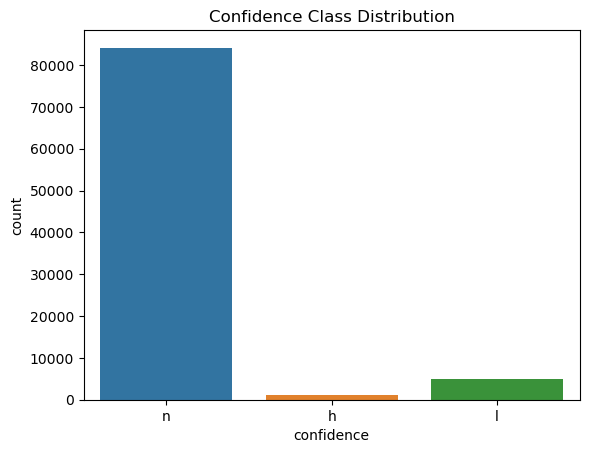

In [13]:
sns.countplot(fire_df, x="confidence", hue="confidence")
plt.title(label="Confidence Class Distribution")

#### Type

Type Type attributed to thermal anomaly:
- 0 = presumed vegetation fire
- 1 = active volcano
- 2 = other static land source
- 3 = offshore detection (includes all detections over water)

In [14]:
fire_df['type'].value_counts()

type
2    75495
0    14216
3      539
Name: count, dtype: int64

Text(0.5, 1.0, 'Type Class Distribution')

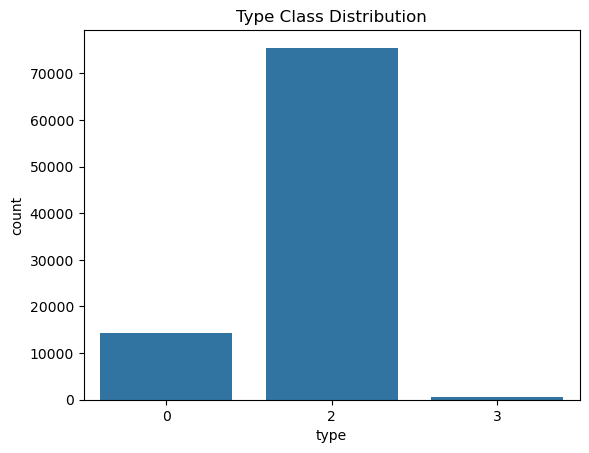

In [15]:
sns.countplot(fire_df, x="type")
plt.title(label="Type Class Distribution")

#### Daynight

This value is binary, and represents whether the fire occurred at daytime or nighttime.

In [16]:
fire_df['daynight'].value_counts()

daynight
N    68979
D    21271
Name: count, dtype: int64

Text(0.5, 1.0, 'Daynight Class Distribution')

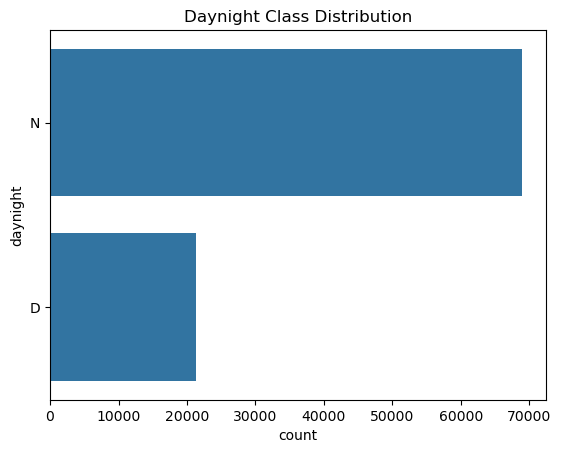

In [17]:
sns.countplot(fire_df, y="daynight")
plt.title(label="Daynight Class Distribution")

=> The dominant class is `N`, which suggests that most fires occur at night.

### Numerical Features

In [18]:
# It is better to extract them manually sine come categorical features such as type also have a numerical dtype.
numerical_features = ['bright_ti4', 'scan', 'track', 'bright_ti5', 'frp']
categorical_features = ['daynight', 'type', 'confidence']

In [19]:
fire_df[numerical_features].describe()

,bright_ti4,scan,track,bright_ti5,frp
count,90250.000000,90250.000000,90250.000000,90250.000000,90250.000000
mean,321.091793,0.475991,0.515446,291.726092,3.447776
std,18.205551,0.101596,0.126508,11.700269,5.222111
min,240.170000,0.320000,0.360000,244.790000,0.060000
25%,305.380000,0.400000,0.390000,282.900000,1.150000
50%,316.710000,0.450000,0.490000,290.790000,2.060000
75%,337.400000,0.540000,0.620000,298.100000,3.920000
max,367.000000,0.800000,0.780000,355.420000,251.890000


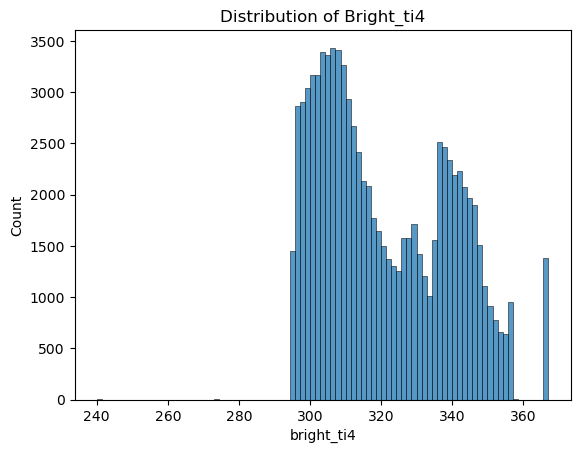

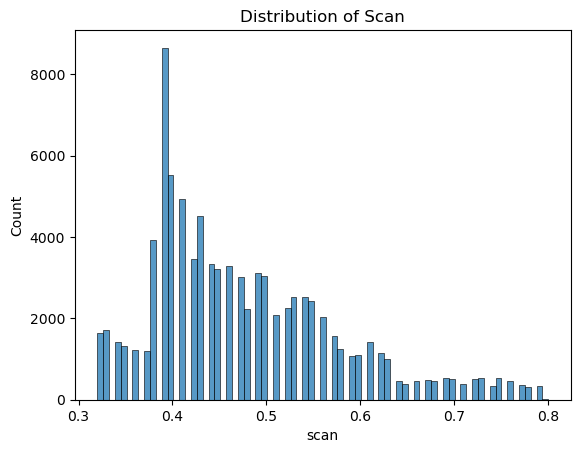

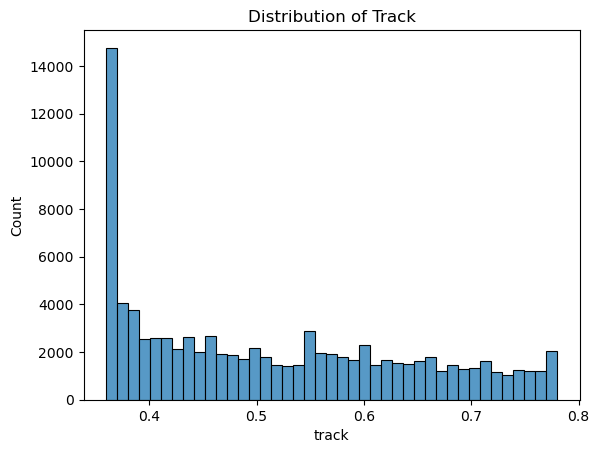

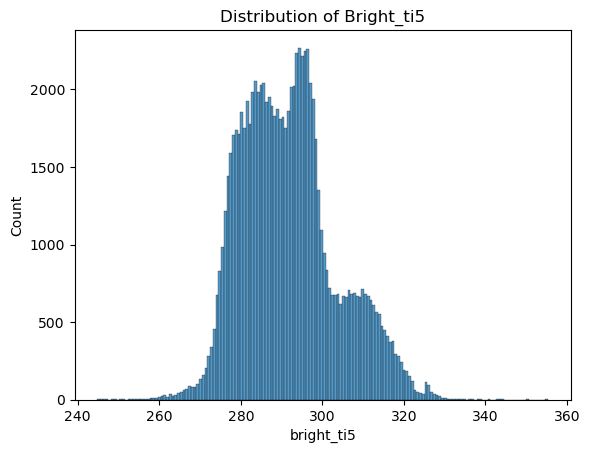

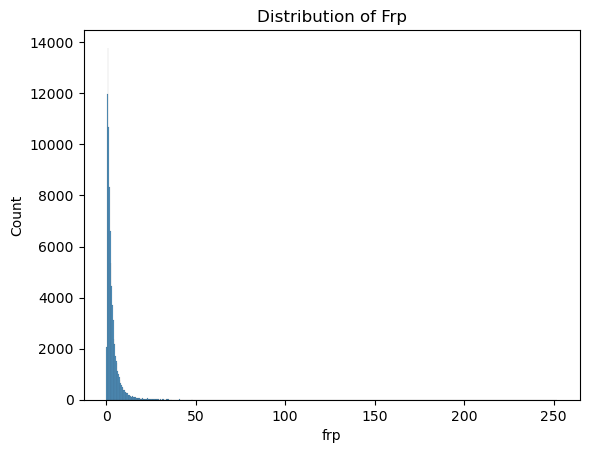

In [20]:
for feature in numerical_features:
    sns.histplot(fire_df, x=feature)
    plt.title(f"Distribution of {feature.capitalize()}")
    plt.show()

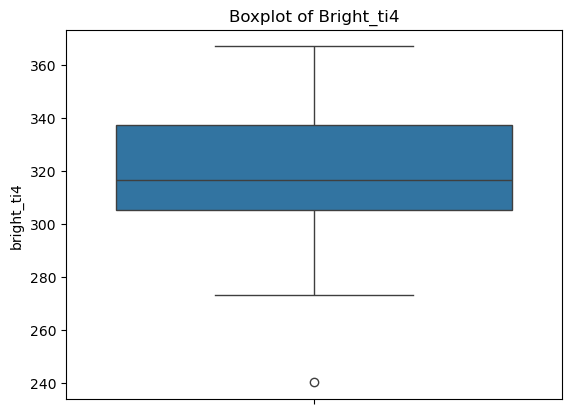

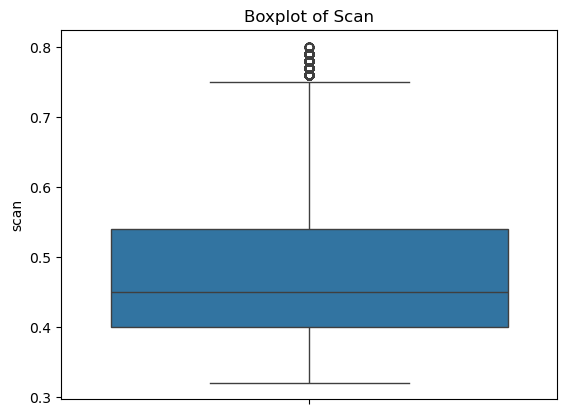

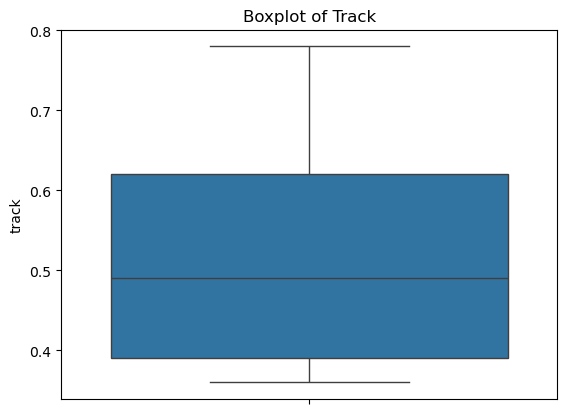

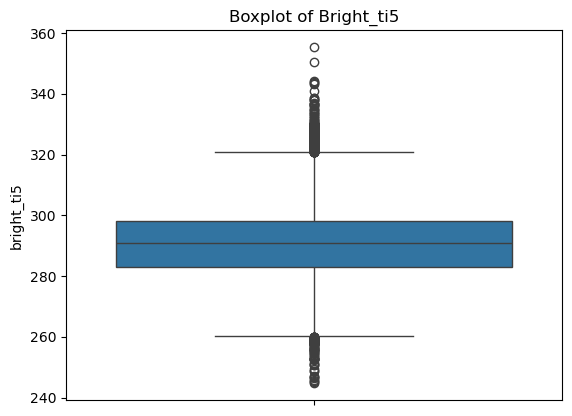

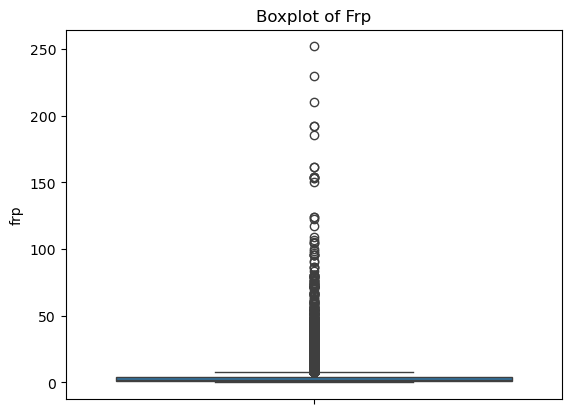

In [21]:
for feature in numerical_features:
    sns.boxplot(fire_df, y=feature)
    plt.title(f"Boxplot of {feature.capitalize()}")
    plt.show()

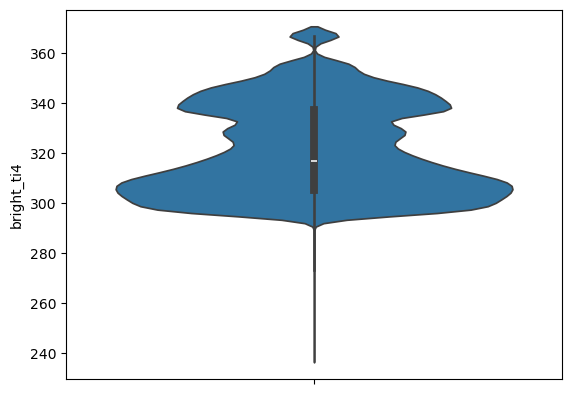

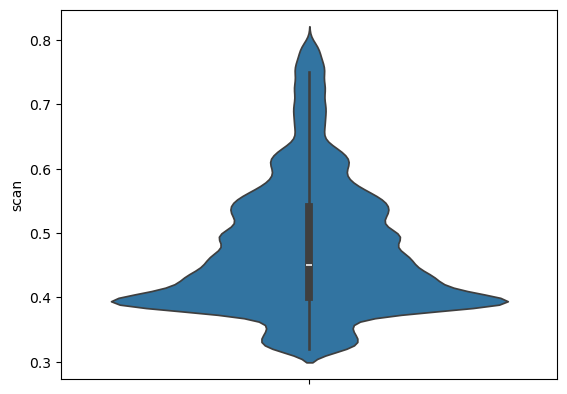

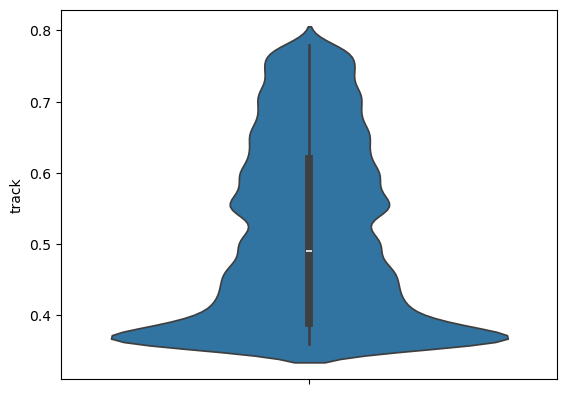

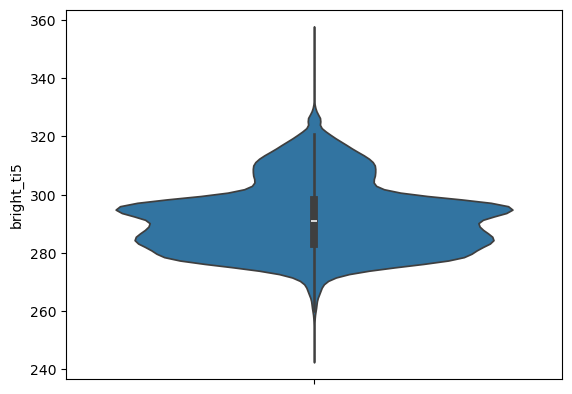

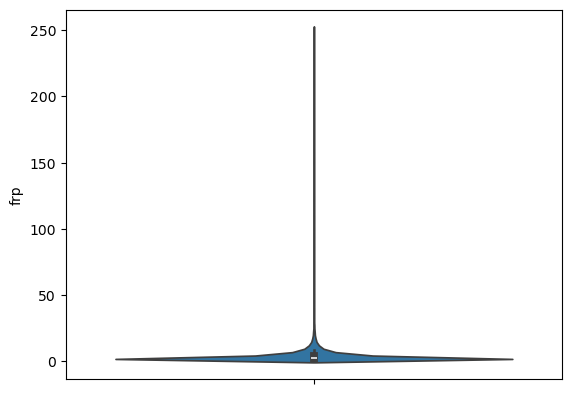

In [22]:
for feature in numerical_features:
    sns.violinplot(fire_df, y=feature)
    plt.show()

## Projection on Map

### Bright ti4

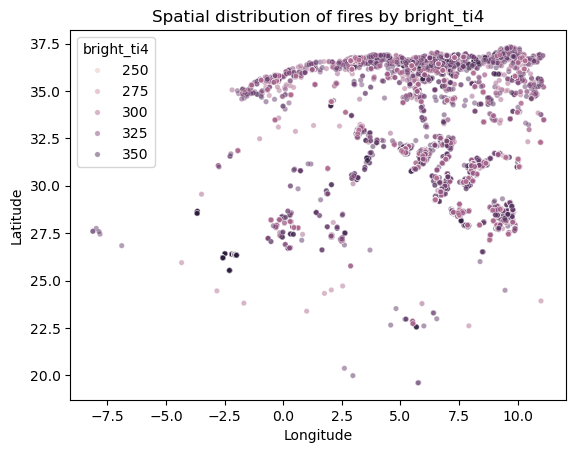

In [23]:
sns.scatterplot(data=fire_df, x='longitude', y='latitude', hue='bright_ti4', alpha=0.5, s=15)
plt.title('Spatial distribution of fires by bright_ti4')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='bright_ti4')
plt.show()

### Bright ti5

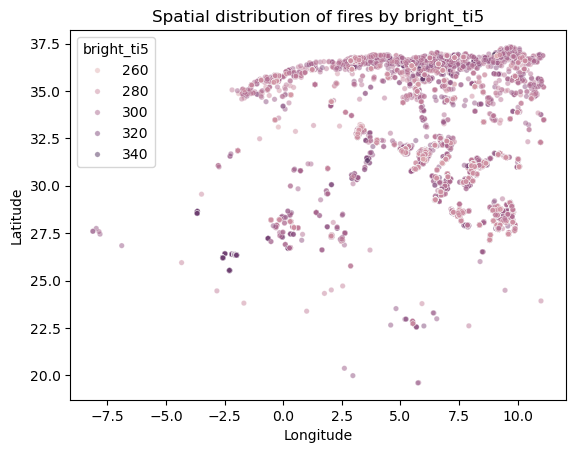

In [24]:
sns.scatterplot(data=fire_df, x='longitude', y='latitude', hue='bright_ti5', alpha=0.5, s=15)
plt.title('Spatial distribution of fires by bright_ti5')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='bright_ti5')
plt.show()

### Type

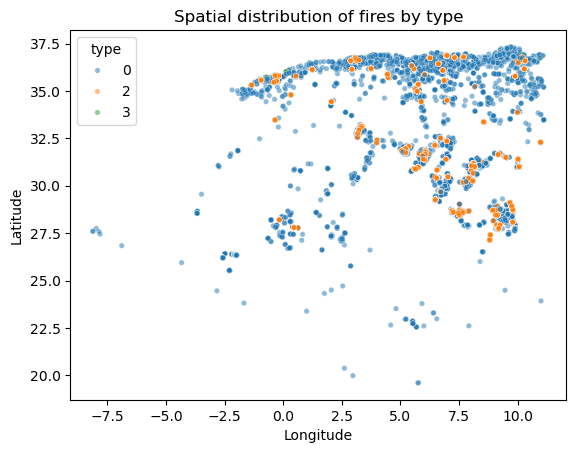

In [25]:
sns.scatterplot(data=fire_df, x='longitude', y='latitude', hue='type', alpha=0.5, s=15, palette='tab10')
plt.title('Spatial distribution of fires by type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### FRP

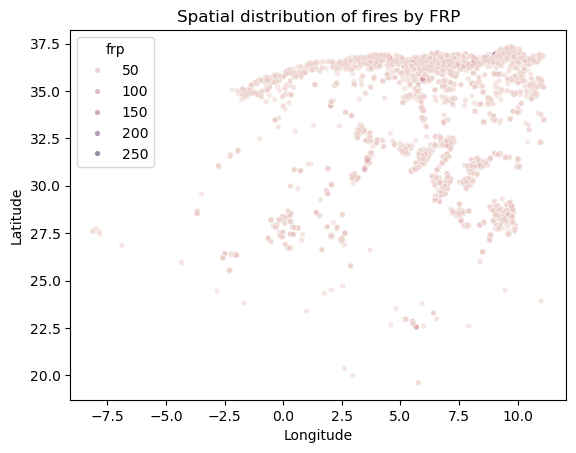

In [26]:
sns.scatterplot(data=fire_df, x='longitude', y='latitude', hue='frp', alpha=0.5, s=15)
plt.title('Spatial distribution of fires by FRP')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Scan

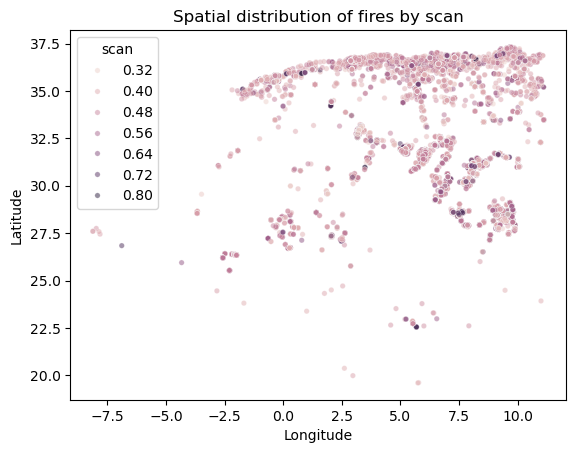

In [27]:
sns.scatterplot(data=fire_df, x='longitude', y='latitude', hue='scan', alpha=0.5, s=15)
plt.title('Spatial distribution of fires by scan')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Track

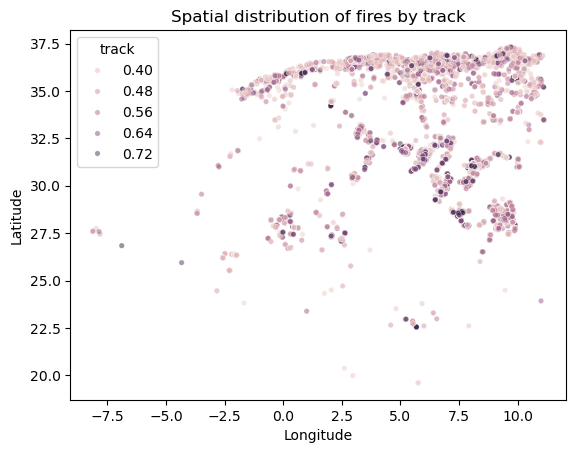

In [28]:
sns.scatterplot(data=fire_df, x='longitude', y='latitude', hue='track', alpha=0.5, s=15)
plt.title('Spatial distribution of fires by track')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Bivariate Analysis

Text(0.5, 1.0, 'Pairwise relationships - numerical features')

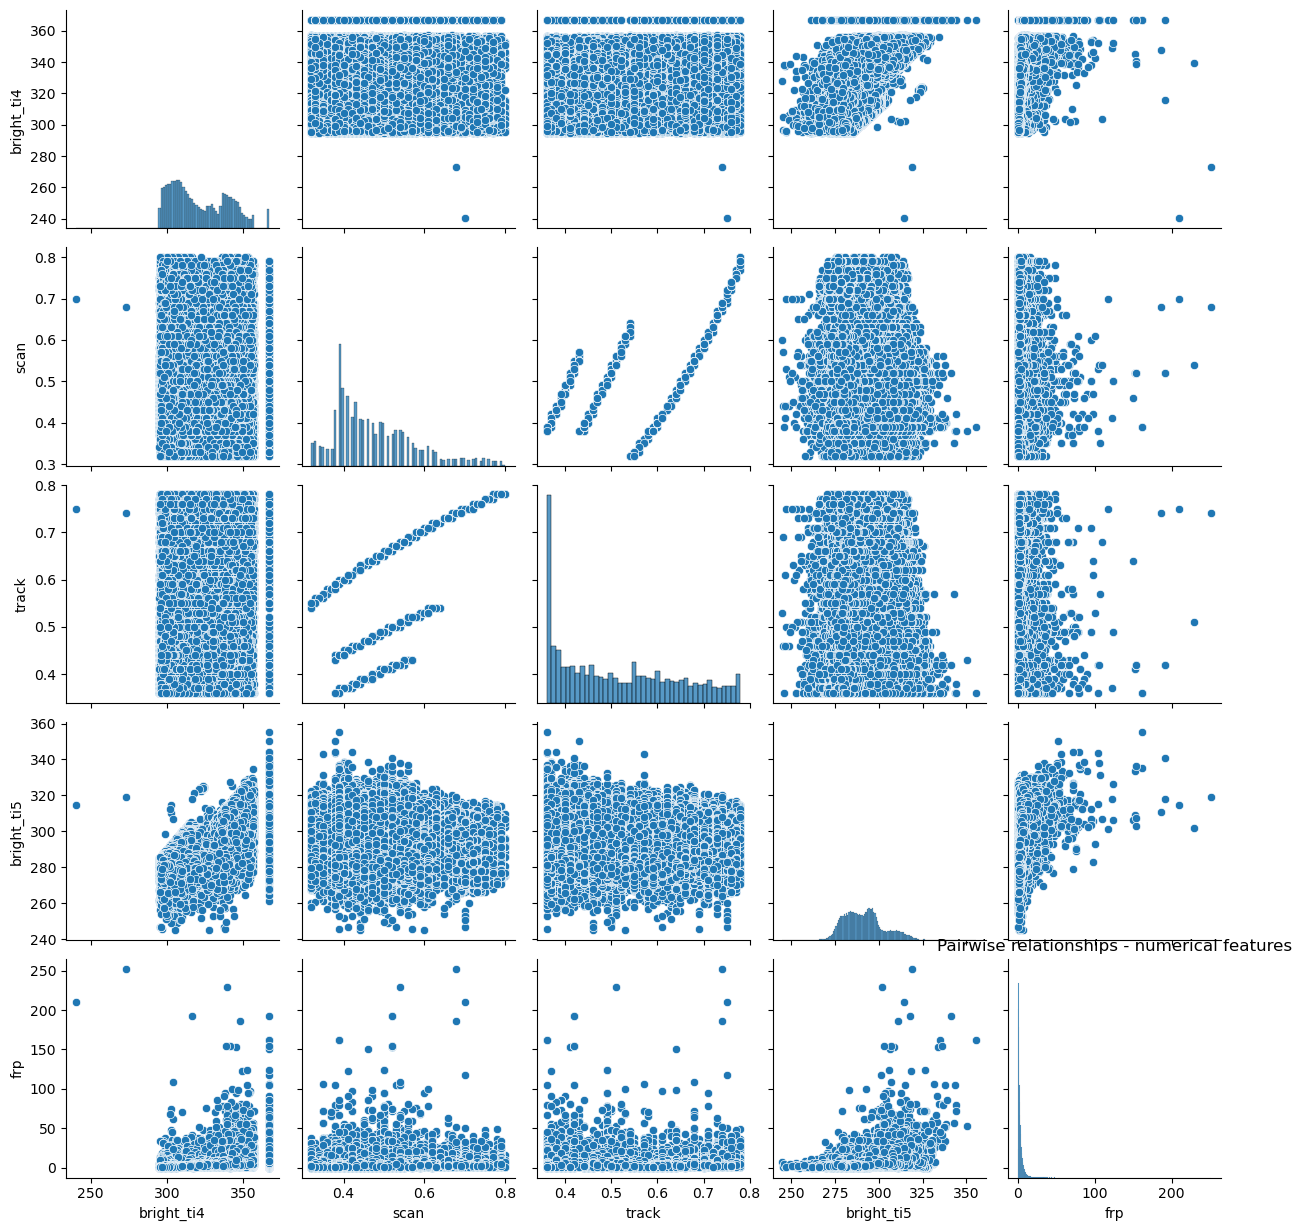

In [29]:
import seaborn as sns

sns.pairplot(fire_df[numerical_features])
plt.title("Pairwise relationships - numerical features")

<Axes: xlabel='acq_date_acq_time', ylabel='frp'>

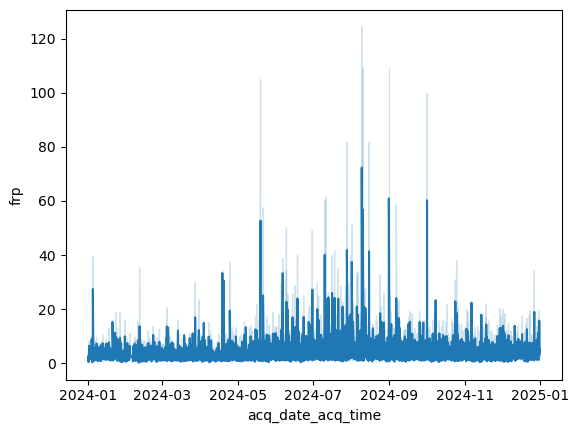

In [30]:
sns.lineplot(fire_df, x='acq_date_acq_time', y='frp')

<Axes: xlabel='acq_date_acq_time', ylabel='bright_ti4'>

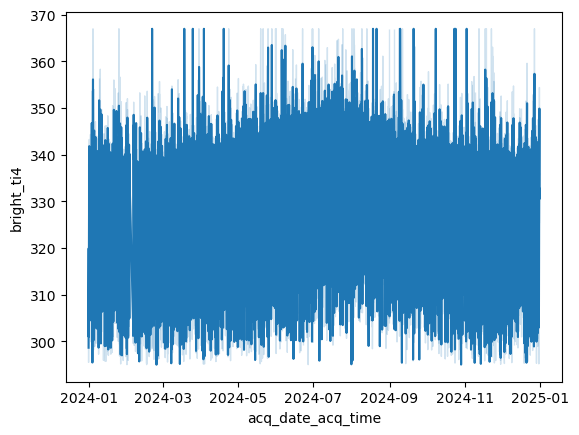

In [31]:
sns.lineplot(fire_df, x='acq_date_acq_time', y='bright_ti4')

<Axes: xlabel='acq_date_acq_time', ylabel='bright_ti5'>

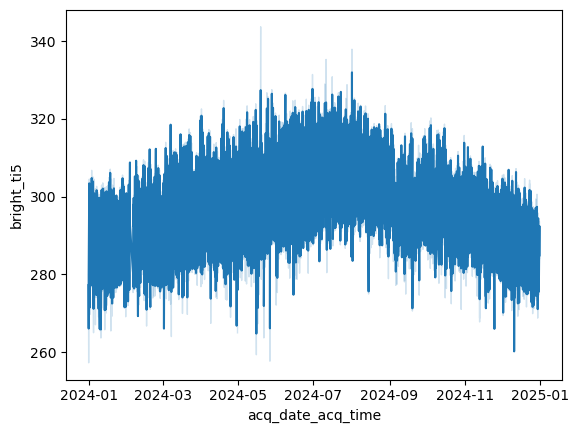

In [32]:
sns.lineplot(fire_df, x='acq_date_acq_time', y='bright_ti5')

<Axes: xlabel='confidence', ylabel='frp'>

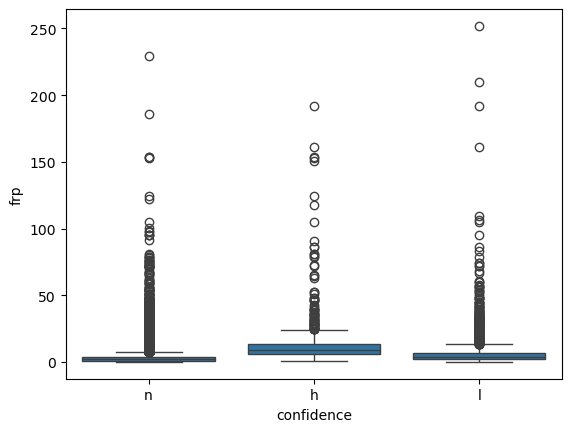

In [33]:
sns.boxplot(fire_df, y='frp', x='confidence')

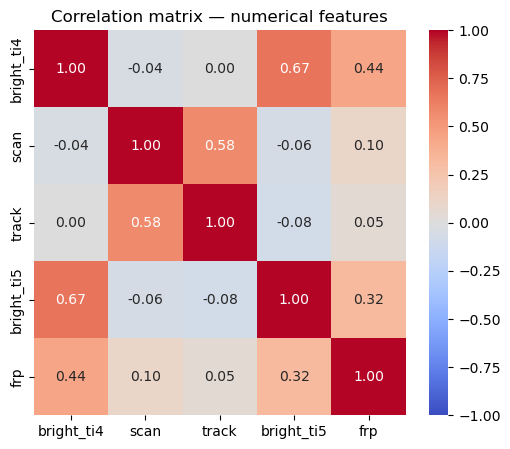

In [34]:
corr = fire_df[numerical_features].astype(float).corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation matrix — numerical features")
plt.show()